In [ ]:
# Import all the necessary libraries
import cv2
import numpy as np
from ultralytics import YOLO
import matplotlib.pyplot as plt

In [ ]:
# Load YOLO 11 Nano model
model=YOLO("yolo11n.pt")

In [ ]:
# Define a function to track the objects in the video feed
def track(s):
    # Initialize video capture and background
    video=cv2.VideoCapture(s)
    ret, background=video.read()
    if ret:
        background=cv2.resize(background, (640, 384))

    # Tracking parameters
    movement={}         # Dictionary to store paths for each person
    next_id=1           # Unique ID for each person
    max_distance=50     # Maximum distance to match detections to existing tracks
    
    while True:
        ret, frame=video.read()
        if not ret:
            break

        frame=cv2.resize(frame, (640, 384))
        results=model(frame)
        detected_people=[]      # Store current frame's detections

        # Parse the detection results
        for result in results:
            for box in result.boxes:
                if int(box.cls[0])==0:                    # 0 is the class ID for 'person'
                    x1, y1, x2, y2=map(int, box.xyxy[0])    # Extract bounding box
                    feet_x=int((x1+x2)/2)                   # Calculate feet position
                    feet_y=y2
                    detected_people.append((feet_x, feet_y))

        # Match detections to existing tracks
        updated_movement={}
        for person_id, path in movement.items():
            last_position=path[-1]          # Last recorded position of the person
            matched=False

            # Match current detections to the person's last position
            for idx, (feet_x, feet_y) in enumerate(detected_people):
                distance=np.linalg.norm(np.array(last_position)-np.array((feet_x, feet_y)))
                if distance<max_distance:       # Match found
                    updated_movement[person_id]=path+[(feet_x, feet_y)]
                    detected_people.pop(idx)    # Remove matched detection
                    matched=True
                    break

            # If no match, keep the path as is
            if not matched:
                updated_movement[person_id]=path

        # Assign new IDs to unmatched detections
        for feet_x, feet_y in detected_people:
            updated_movement[next_id]=[(feet_x, feet_y)]
            next_id+=1

        movement=updated_movement

    video.release()

    # Convert the background to RGB for matplotlib
    background_rgb=cv2.cvtColor(background, cv2.COLOR_BGR2RGB)
    return background_rgb, movement

In [ ]:
# Define a function to plot all the paths when the background image and the set of coordinates is given
def printPath(a, b):
    # Plot the paths on the background image
    plt.figure(figsize=(10, 6))
    plt.imshow(a)

    # Plot each person's path with a unique color
    for person_id, path in b.items():
        path=np.array(path)
        if len(path)>0:
            plt.plot(path[:, 0], path[:, 1], label=f'Person {person_id}')

    plt.legend()
    plt.title("Paths of Detected People")
    plt.show()

In [ ]:
# Define a function to plot only the focal object and ignore the others
def printSingle(a, b):
    plt.figure(figsize=(10, 6))
    plt.imshow(a)
    plt.plot(b[:, 0], b[:, 1], 'r-')
    plt.show()

In [25]:
background_rgb1, movement1=track('Feed/Feed1.mp4')


0: 384x640 1 person, 231.6ms
Speed: 66.0ms preprocess, 231.6ms inference, 33.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 98.0ms
Speed: 2.0ms preprocess, 98.0ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 93.6ms
Speed: 1.0ms preprocess, 93.6ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 2 persons, 79.0ms
Speed: 2.0ms preprocess, 79.0ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 2 persons, 82.0ms
Speed: 3.0ms preprocess, 82.0ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 2 persons, 86.0ms
Speed: 2.9ms preprocess, 86.0ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 2 persons, 78.0ms
Speed: 3.0ms preprocess, 78.0ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 2 persons, 85.0ms
Speed: 2.8ms preprocess, 85.0ms inference, 1.0ms postprocess per image at shape 

In [53]:
mov1=np.array(movement1[1])

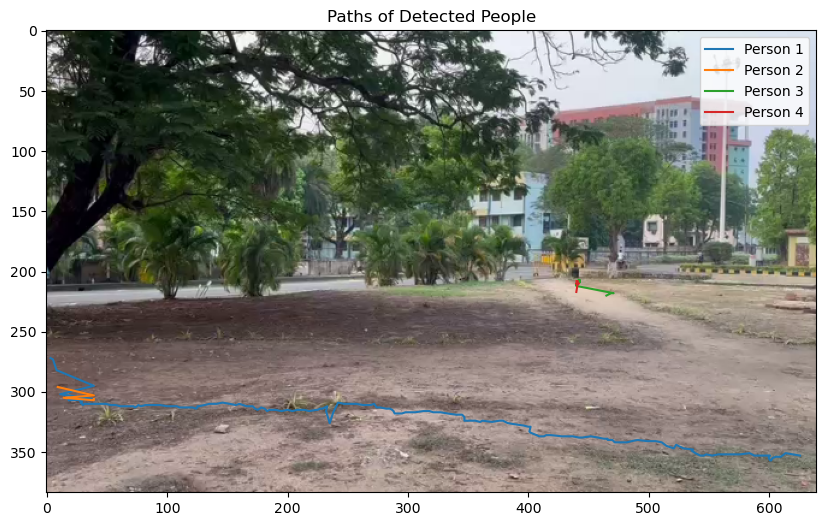

In [54]:
printPath(background_rgb1, movement1)

In [56]:
mov1=np.delete(mov1, [0,1,2,3,4,5,78], axis=0)

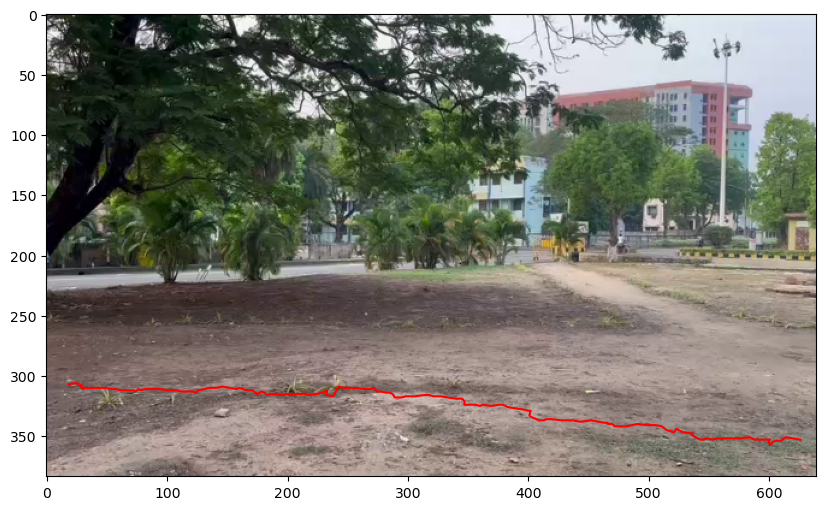

In [57]:
printSingle(background_rgb1, mov1)

In [58]:
np.save('movement_1.npy', mov1)

In [59]:
background_rgb2, movement2=track('Feed/Feed2.mp4')


0: 384x640 (no detections), 171.4ms
Speed: 15.6ms preprocess, 171.4ms inference, 2.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 108.0ms
Speed: 2.0ms preprocess, 108.0ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 109.0ms
Speed: 1.0ms preprocess, 109.0ms inference, 0.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 101.0ms
Speed: 2.0ms preprocess, 101.0ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 109.0ms
Speed: 2.0ms preprocess, 109.0ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 175.0ms
Speed: 2.0ms preprocess, 175.0ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 116.5ms
Speed: 5.0ms preprocess, 116.5ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 98.0ms
Speed: 3.0ms prepr

In [61]:
mov2=np.array(movement2[1])

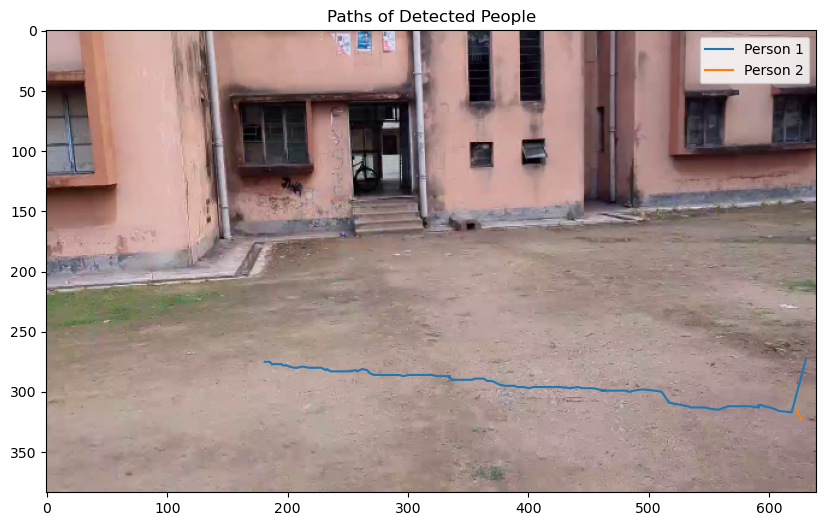

In [62]:
printPath(background_rgb2, movement2)

In [64]:
mov2=np.delete(mov2, [0], axis=0)

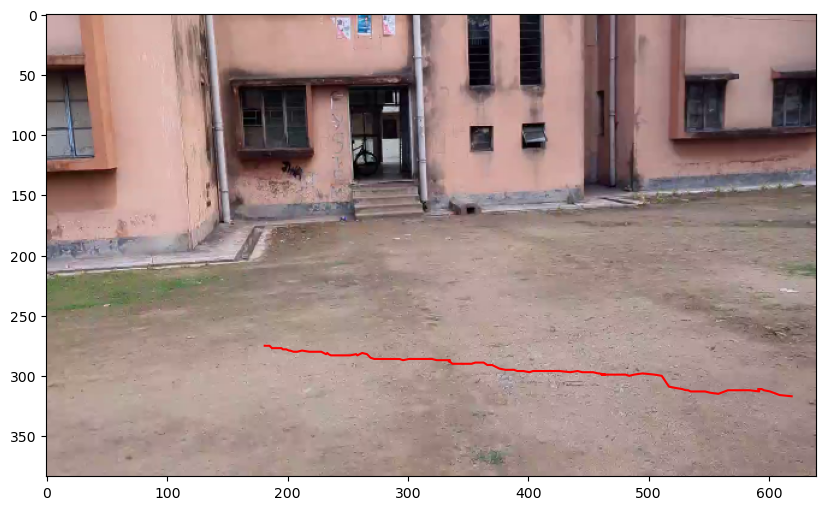

In [65]:
printSingle(background_rgb2, mov2)

In [66]:
np.save('movement_2.npy', mov2)